In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly as py
import plotly.graph_objs as go
import plotly.graph_objs as go
import plotly.offline as pyo

In [3]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


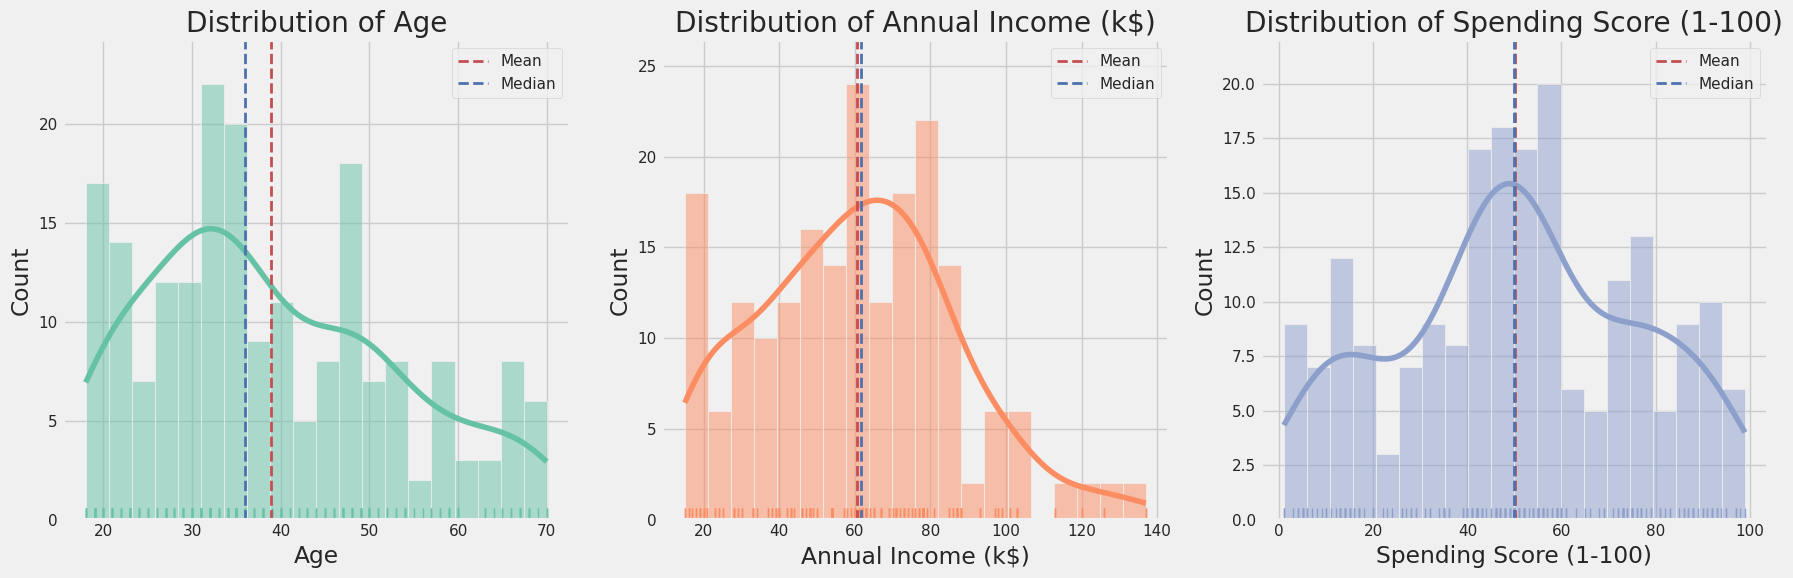

In [6]:
palette = sns.color_palette("Set2")

plt.style.use('fivethirtyeight')
plt.figure(1, figsize=(18, 6))

for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)

    # Plot the histogram with KDE
    sns.histplot(df[feature], bins=20, kde=True, color=palette[i-1])

    # Add rug plot separately
    sns.rugplot(df[feature], color=palette[i-1])

    # Add vertical lines for mean and median
    plt.axvline(df[feature].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(df[feature].median(), color='b', linestyle='dashed', linewidth=2, label='Median')

    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

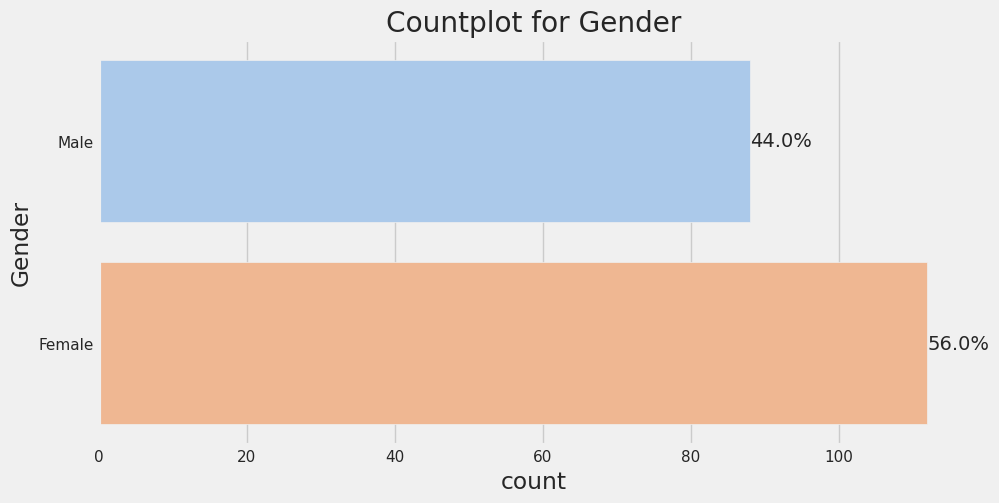

In [7]:
palette = sns.color_palette("pastel")

plt.figure(1, figsize=(10, 5))

# Countplot for Gender
sns.countplot(y="Gender", data=df, palette=palette)

# Add percentages on the bars
total = len(df['Gender'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    plt.annotate(percentage, (x, y), ha='left', va='center')

plt.title('Countplot for Gender')
plt.show()

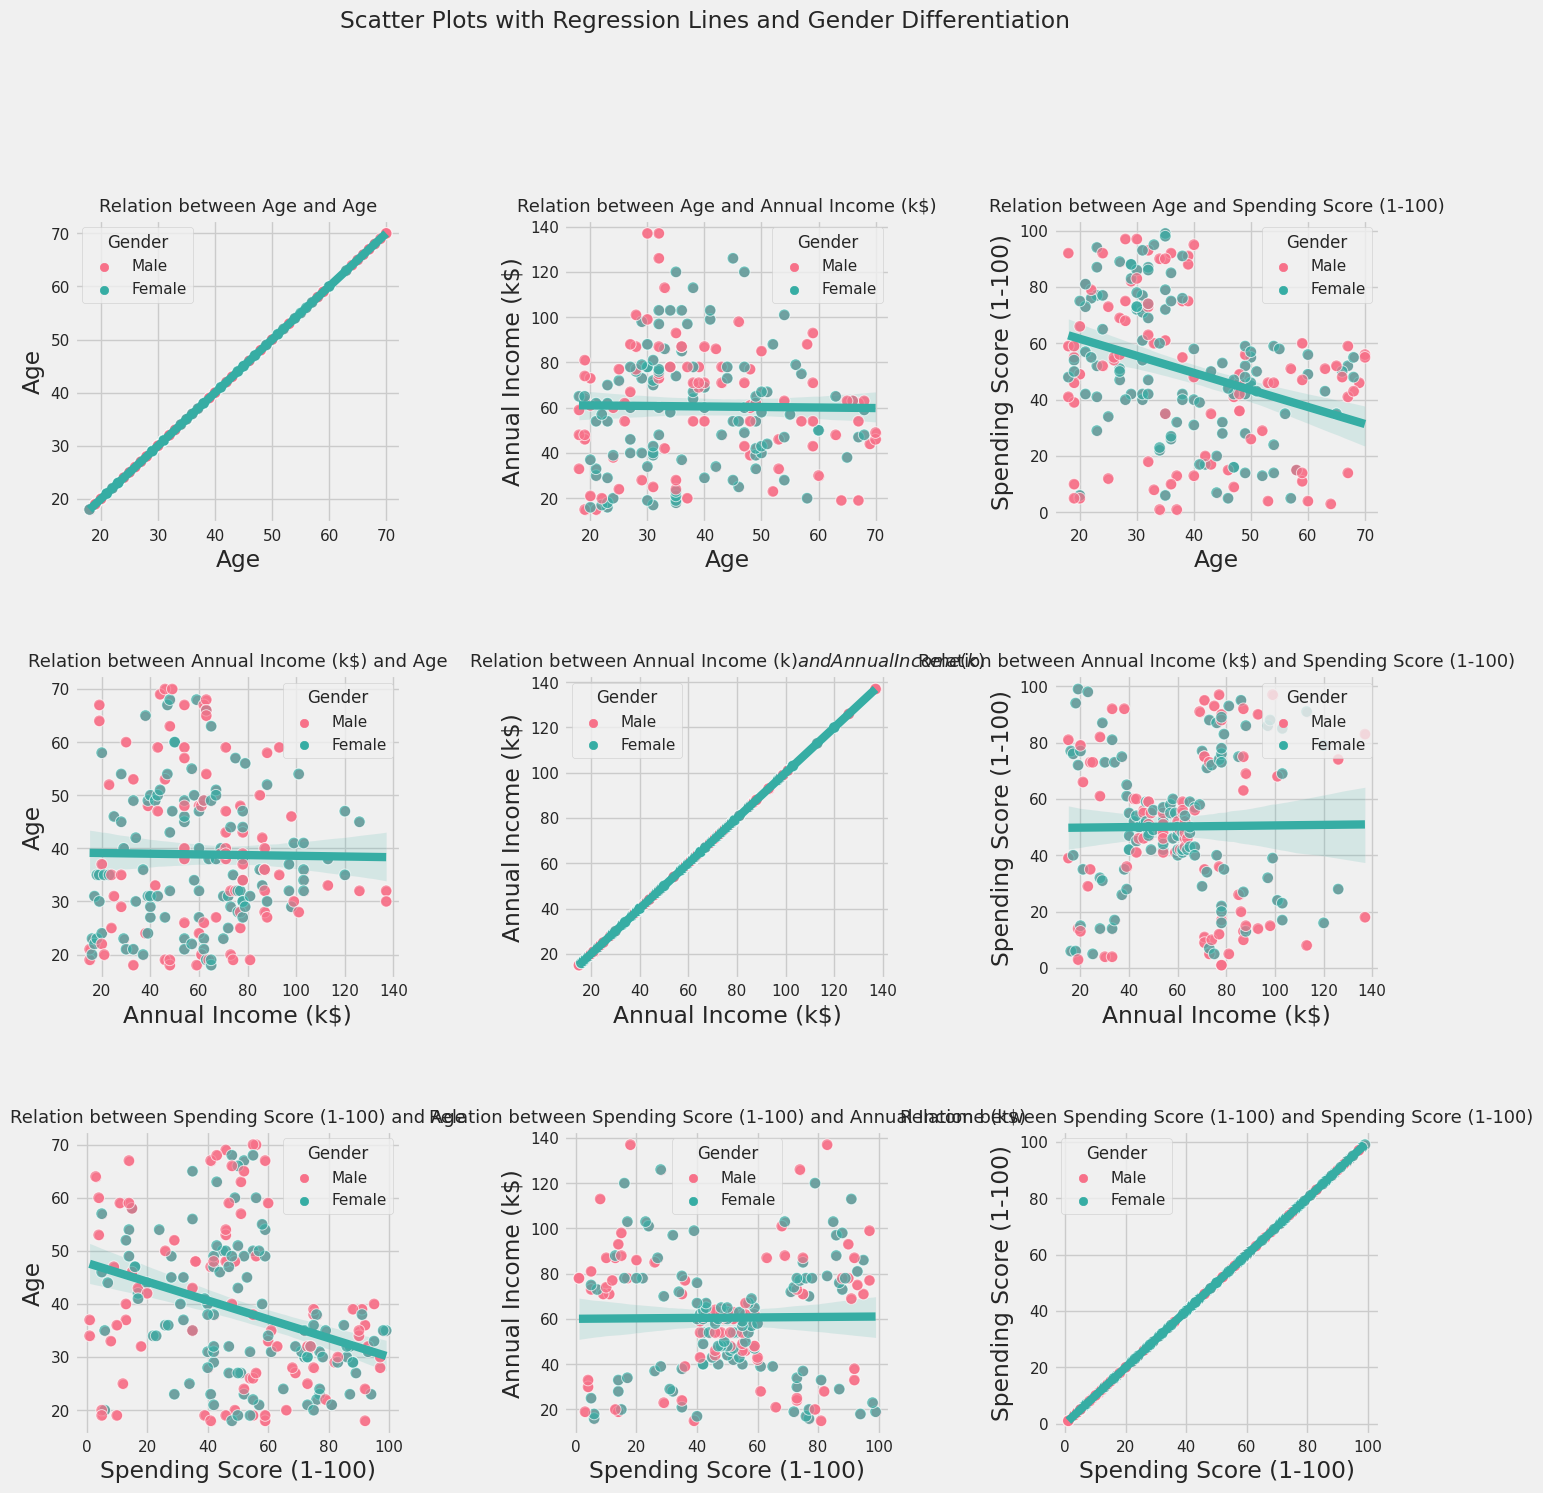

In [8]:
plt.style.use("fivethirtyeight")
plt.figure(1, figsize=(15, 15))
n = 0

palette = sns.color_palette("husl", 2)

for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)

        # Scatter plot with regression line
        sns.regplot(x=i, y=y, data=df, scatter_kws={'color': palette[0]}, line_kws={'color': palette[1]})

        # Add points with different colors based on Gender
        sns.scatterplot(x=i, y=y, hue='Gender', data=df, palette=palette, s=70, alpha=0.7)

        plt.xlabel(i)
        plt.ylabel(y)
        plt.title(f'Relation between {i} and {y}', fontsize = 13)

plt.suptitle('Scatter Plots with Regression Lines and Gender Differentiation', y=1.02)
plt.show()

<ipython-input-9-da1fca5a2238>:7: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



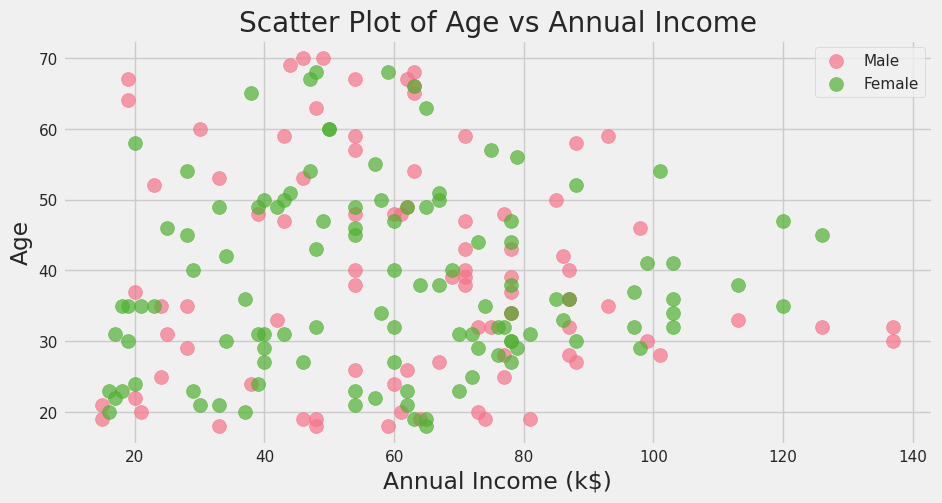

In [9]:
plt.figure(1, figsize=(10, 5))

palette = sns.color_palette("husl", 3)

for x in ["Male", "Female"]:
    subset = df[df["Gender"] == x]
    plt.scatter(x="Annual Income (k$)", y="Age", data=subset, s=100, alpha=0.7, label=x, c=palette.pop(0))

plt.xlabel("Annual Income (k$)")
plt.ylabel("Age")
plt.title("Scatter Plot of Age vs Annual Income")
plt.legend()
plt.show()

<ipython-input-10-4437a2d4d294>:7: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



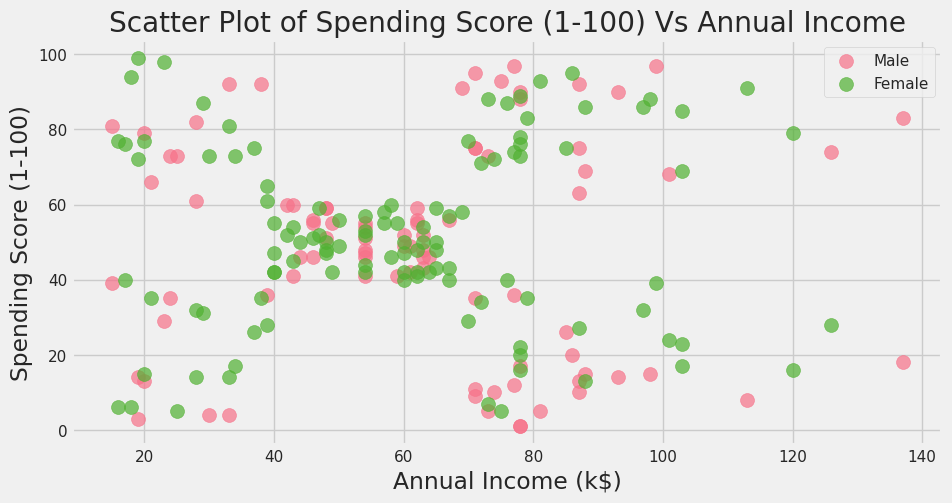

In [10]:
plt.figure(1, figsize=(10, 5))

palette = sns.color_palette("husl", 3)

for x in ["Male", "Female"]:
    subset = df[df["Gender"] == x]
    plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", data=subset, s=100, alpha=0.7, label=x, c=palette.pop(0))

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Scatter Plot of Spending Score (1-100) Vs Annual Income")
plt.legend()
plt.show()

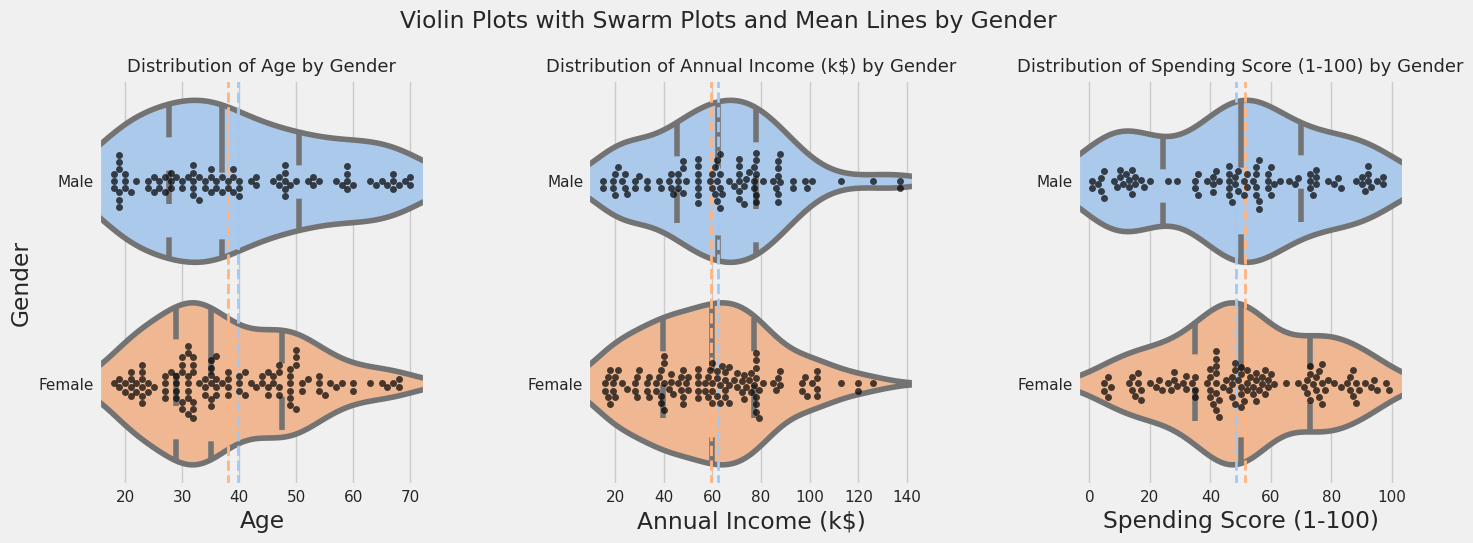

In [11]:
plt.figure(1, figsize=(15, 5))
n = 0

palette = sns.color_palette("pastel")

for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    # Violin plot with statistical summary
    sns.violinplot(x=cols, y='Gender', data=df, palette=palette, inner="quartile", scale="width")

    # Swarm plot to show individual data points
    sns.swarmplot(x=cols, y='Gender', data=df, color='black', alpha=0.7)

    # Add mean lines for each category
    plt.axvline(df.groupby('Gender')[cols].mean().loc['Male'], color=palette[0], linestyle='dashed', linewidth=2)
    plt.axvline(df.groupby('Gender')[cols].mean().loc['Female'], color=palette[1], linestyle='dashed', linewidth=2)

    plt.ylabel('Gender' if n == 1 else '')
    plt.title(f'Distribution of {cols} by Gender', fontsize = 13)

plt.suptitle('Violin Plots with Swarm Plots and Mean Lines by Gender', y=1.02)
plt.show()


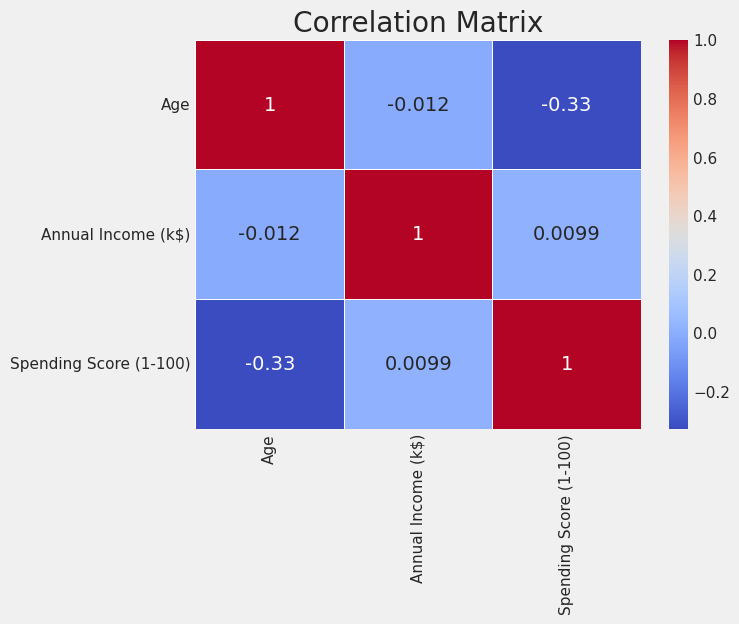

In [12]:
# Correlation Analysis
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

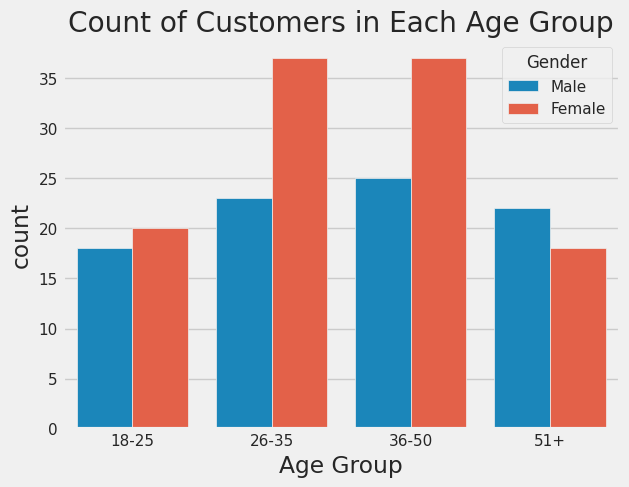

In [13]:
# Age Group Analysis
bins = [0, 25, 35, 50, 100]
labels = ['18-25', '26-35', '36-50', '51+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
sns.countplot(x='Age Group', data=df, hue='Gender')
plt.title('Count of Customers in Each Age Group')
plt.show()


In [14]:
x = df[["Age",'Annual Income (k$)', 'Spending Score (1-100)']]
Age_a = x.iloc[:,:2]
scaler = StandardScaler()
Age_a_scaled = scaler.fit_transform(Age_a)
Age_a_scaled[:5]

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033]])

In [15]:
# Creating WCSS
WCSS = []
for i in range(1,10):
    Kmeans = KMeans(i)
    Kmeans.fit(Age_a_scaled)
    wcss_iner = Kmeans.inertia_
    WCSS.append(wcss_iner)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

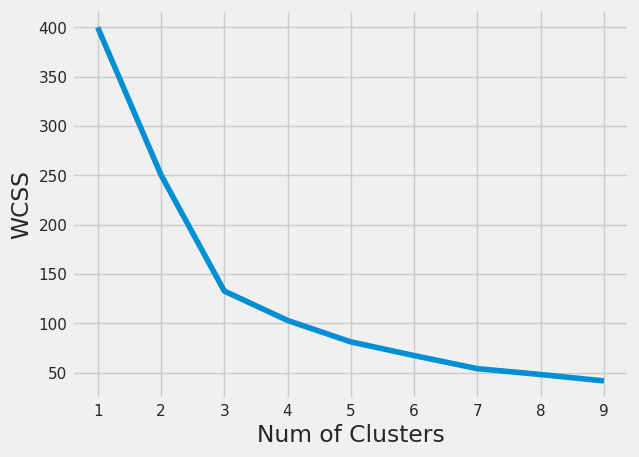

In [16]:
# Plotting WCSS
num_clusters = range(1,10)
plt.plot(num_clusters,WCSS)
plt.xlabel("Num of Clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
# Fitting KMeans with 6 clusters
n_Kmeans = KMeans(7,random_state=42)
n_Kmeans.fit(Age_a_scaled)
x["Clusters"] = n_Kmeans.fit_predict(Age_a_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-17-3386d510e187>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



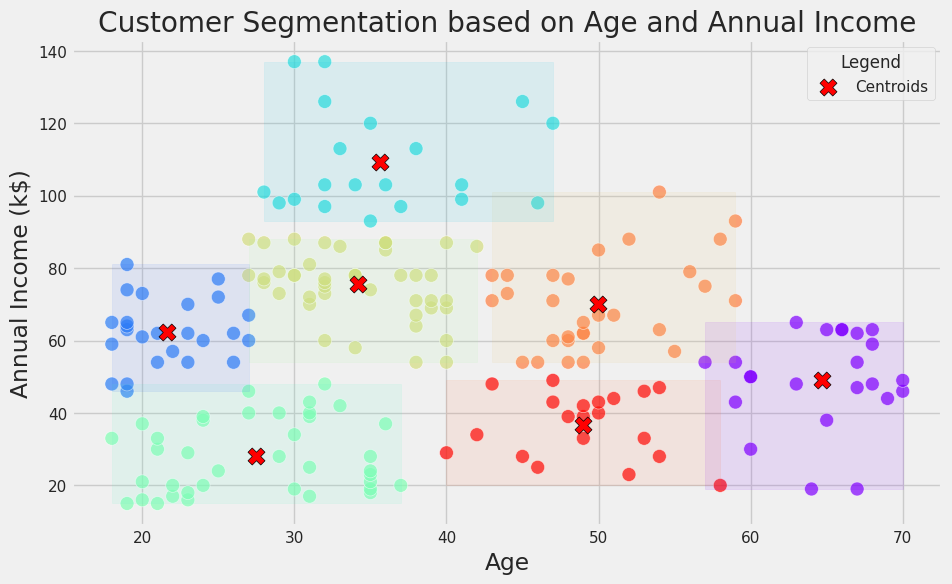

In [18]:
# Create and fit the StandardScaler
scaler = StandardScaler()
scaler.fit(Age_a)

# Transform the centroids back to the original scale
centroids_unscaled = scaler.inverse_transform(n_Kmeans.cluster_centers_)

# Plotting the Scatter with Centroids and Shadows using unscaled features
plt.figure(figsize=(10, 6))

# Scatter plot with unscaled features
scatter = plt.scatter(x["Age"], x["Annual Income (k$)"], c=x["Clusters"],s=100, cmap="rainbow", alpha=0.7, edgecolors="w", linewidth=0.5)

# Plotting unscaled centroids
plt.scatter(centroids_unscaled[:, 0], centroids_unscaled[:, 1], c='red', marker='X', s=150, label='Centroids', edgecolors='black', zorder=10)

# Plotting shadows
for cluster_label in x['Clusters'].unique():
    cluster_points = x[x['Clusters'] == cluster_label][['Age', 'Annual Income (k$)']]
    plt.fill_betweenx(cluster_points['Annual Income (k$)'], cluster_points['Age'].min(), cluster_points['Age'].max(),
                      alpha=0.1, color=plt.cm.rainbow(cluster_label / len(centroids_unscaled)))

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Customer Segmentation based on Age and Annual Income")

# Add legend
plt.legend(title="Legend")

# Show plot
plt.show()


In [19]:
# Sclicing the cols and scale it
Age_s = x.iloc[:,[0,-2]]
scaler = StandardScaler()
Age_s_scaled = scaler.fit_transform(Age_s)
Age_s_scaled[:5]

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992]])

In [20]:
# Creating WCSS2 for age and spending score
WCSS2 = []
for i in range(1,10):
    Kmeans = KMeans(i)
    Kmeans.fit(Age_s_scaled)
    wcss_iner = Kmeans.inertia_
    WCSS2.append(wcss_iner)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

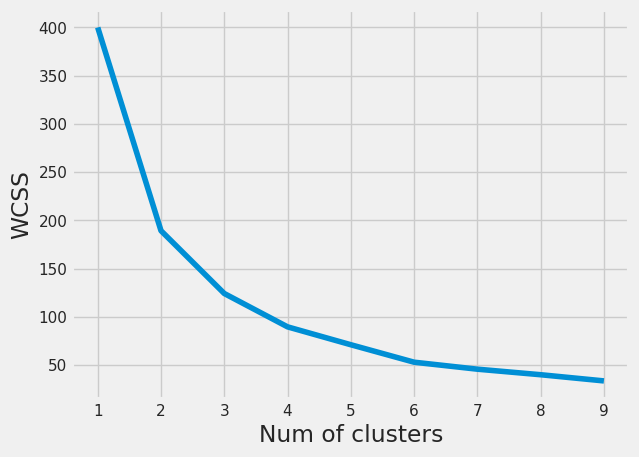

In [21]:
#Plotting WCSS and Num of clusters
num_clusters = range(1,10)
plt.plot(num_clusters, WCSS2)
plt.xlabel("Num of clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
# Fitting KMeans with 6 clusters
Kmeans2 = KMeans(3,random_state=42)
Kmeans2.fit(Age_s_scaled)
x["Cluster2"] = Kmeans2.fit_predict(Age_s_scaled)
x[:5]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-22-67eb69375825>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Annual Income (k$),Spending Score (1-100),Clusters,Cluster2
0,19,15,39,3,0
1,21,15,81,3,2
2,20,16,6,3,0
3,23,16,77,3,2
4,31,17,40,3,0


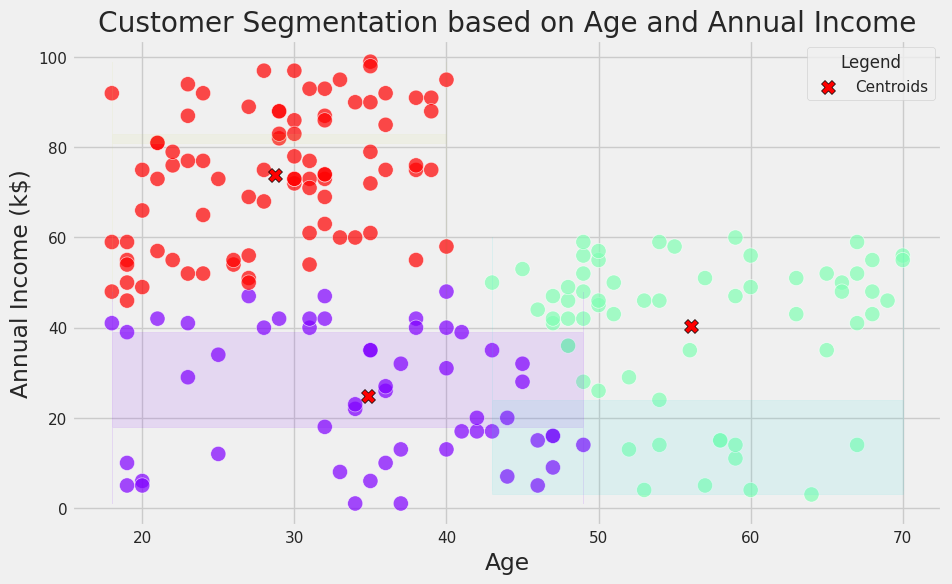

In [23]:
# Create and fit the StandardScaler
scaler = StandardScaler()
scaler.fit(Age_s)

# Transform the centroids back to the original scale
centroids_unscaled = scaler.inverse_transform(Kmeans2.cluster_centers_)

# Plotting the Scatter with Centroids and Shadows using unscaled features
plt.figure(figsize=(10, 6))

# Scatter plot with unscaled features
scatter = plt.scatter(x["Age"], x["Spending Score (1-100)"], c=x["Cluster2"],s=120, cmap="rainbow", alpha=0.7, edgecolors="w", linewidth=0.5)

# Plotting unscaled centroids
plt.scatter(centroids_unscaled[:, 0], centroids_unscaled[:, 1], c='red', marker='X', s=100, label='Centroids', edgecolors='black', zorder=10)

# Plotting shadows
for cluster_label in x['Cluster2'].unique():
    cluster_points = x[x['Cluster2'] == cluster_label][['Age', 'Spending Score (1-100)']]
    plt.fill_betweenx(cluster_points['Spending Score (1-100)'], cluster_points['Age'].min(), cluster_points['Age'].max(),
                      alpha=0.1, color=plt.cm.rainbow(cluster_label / len(centroids_unscaled)))

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Customer Segmentation based on Age and Annual Income")

# Add legend
plt.legend(title="Legend")

# Show plot
plt.show()

In [24]:
# scale the features (age,annual income, spending score)
age_a_s = x.iloc[:,:3]
scaler = StandardScaler()
age_a_s_scaled = scaler.fit_transform(age_a_s)
age_a_s_scaled[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [25]:
WCSS3 =[]
for i in range (1,10):
    Kmeans3 = KMeans(i)
    Kmeans3.fit(age_a_s_scaled)
    wcss_iner = Kmeans3.inertia_
    WCSS3.append(wcss_iner)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

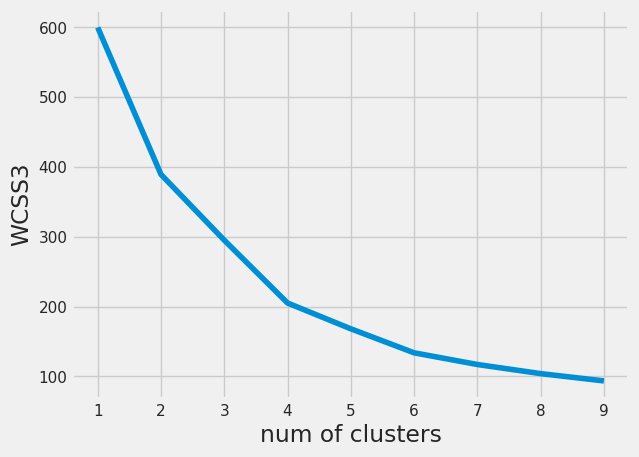

In [26]:
num_clusters = range(1,10)
plt.plot(num_clusters,WCSS3)
plt.xlabel("num of clusters")
plt.ylabel("WCSS3")
plt.show()


In [27]:
# Fitting with k-means 6
Kmeans3 = KMeans(6, random_state = 42)
Kmeans3.fit(age_a_s_scaled)
x["Clusters3"] = Kmeans3.fit_predict(age_a_s_scaled)
x[:5]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Age,Annual Income (k$),Spending Score (1-100),Clusters,Cluster2,Clusters3
0,19,15,39,3,0,0
1,21,15,81,3,2,0
2,20,16,6,3,0,5
3,23,16,77,3,2,0
4,31,17,40,3,0,5


In [28]:
trace1 = go.Scatter3d(
    x=x['Age'],
    y=x['Spending Score (1-100)'],
    z=x['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=x['Clusters3'],
        size=20,
        line=dict(
            color=x['Clusters3'],
            width=12
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)